# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *Dmitry Abramov*</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib
plt.xkcd()
import numpy as np
import pandas as pd
import scipy as sp
import networkx as nx
import operator
%matplotlib inline

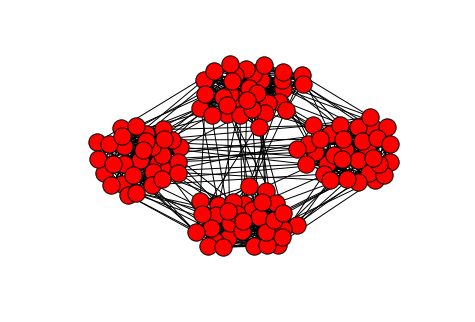

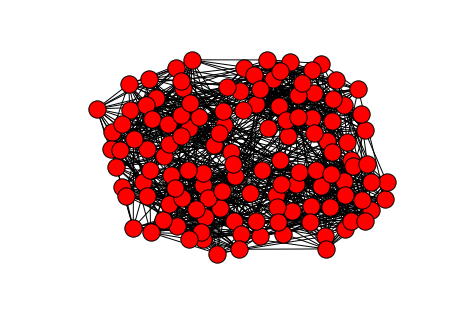

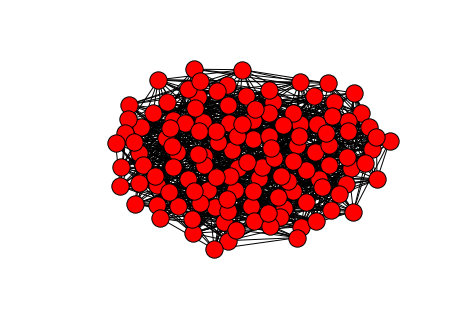

In [6]:
import scipy.io
networks = ('network1.mat', 'network2.mat', 'network3.mat')
kk = 0
for nw in networks:
    kk += 1
    data = scipy.io.loadmat(nw)
    G = nx.Graph(data['A'])
    plt.figure(kk)
    nx.draw(G)
    #axs[k] = nx.draw(G)

Let's create some helpful functions for Markov Cluster Alogirthm:

In [9]:
def normalize(A):
    column_sums = A.sum(axis=0)
    new_matrix = A / column_sums[np.newaxis, :]
    return new_matrix

def inflate(A, inflate_factor):
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
    return np.linalg.matrix_power(A, expand_factor)

def add_diag(A, mult_factor):
    return A + mult_factor * np.identity(A.shape[0])

def get_clusters(A):
    clusters = []
    for i, r in enumerate((A>0).tolist()):
        if r[i]:
            clusters.append(A[i,:]>0)

    clust_map  ={}
    for cn , c in enumerate(clusters):
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]
    return clust_map

def draw(G, A, cluster_map):
    import networkx as nx
    import matplotlib.pyplot as plt

    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))

    pos = nx.spring_layout(G)

    from matplotlib.pylab import matshow, show, cm
    plt.figure(2)
    nx.draw_networkx_nodes(G, pos,node_size = 200, node_color =colors , cmap=plt.cm.Blues )
    nx.draw_networkx_edges(G,pos, alpha=0.5)
    matshow(A, fignum=1, cmap=cm.gray)
    plt.show()
    show()


def stop(M, i):

    if i%5==4:
        m = np.max( M**2 - M) - np.min( M**2 - M)
        if m==0:
            return True

    return False

Let's check out the result of our community detection algorithms for Network 1. We will try it for different p and alpha (from 0 to 4 each):

 -----------
p =  0
alpha =  0
number of clusters:  128


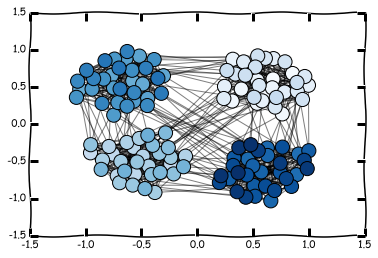

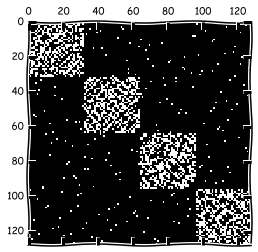

-----------
p =  0
alpha =  1
number of clusters:  128


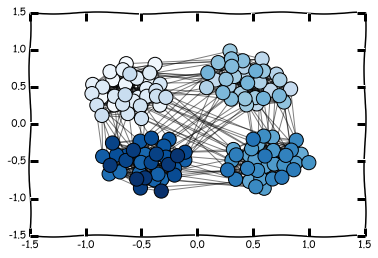

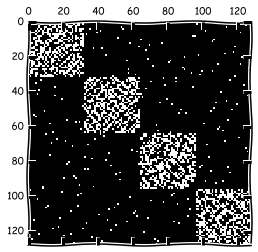

-----------
p =  0
alpha =  2
number of clusters:  128


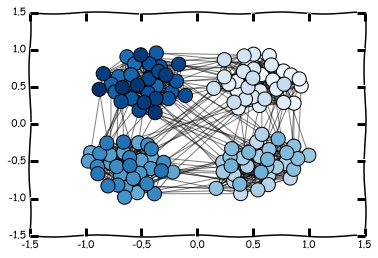

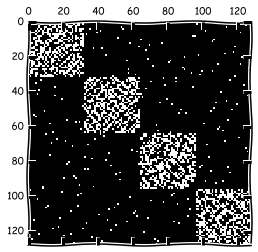

-----------
p =  0
alpha =  3
number of clusters:  128


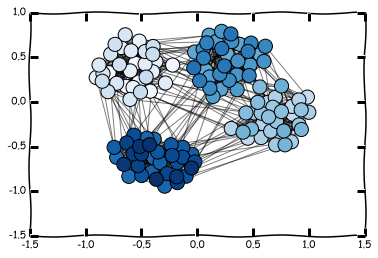

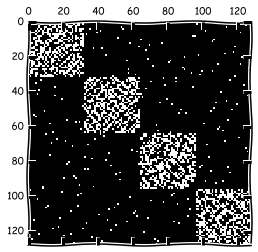

-----------
p =  0
alpha =  4
number of clusters:  128


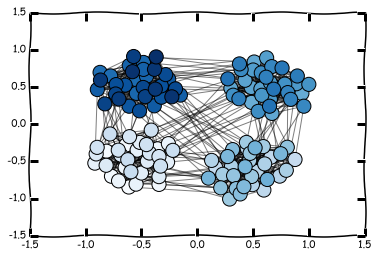

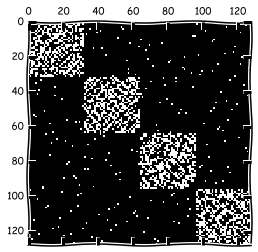

-----------
p =  1
alpha =  0
number of clusters:  128


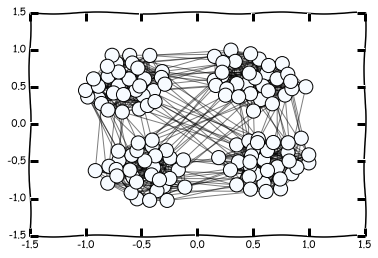

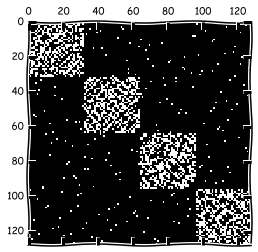

-----------
p =  1
alpha =  1
number of clusters:  128


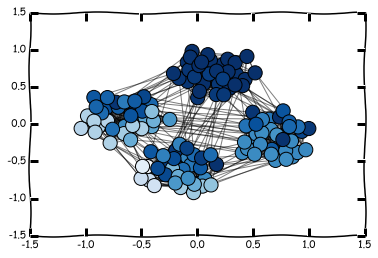

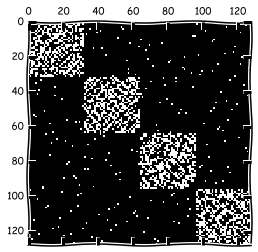

-----------
p =  1
alpha =  2
number of clusters:  128


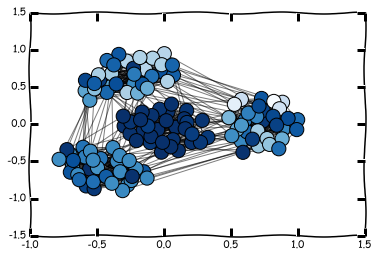

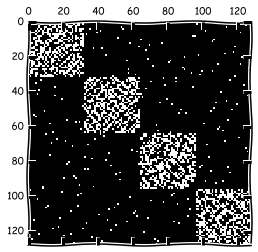

-----------
p =  1
alpha =  3
number of clusters:  128


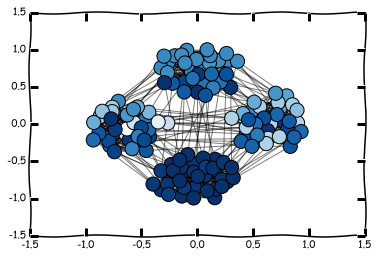

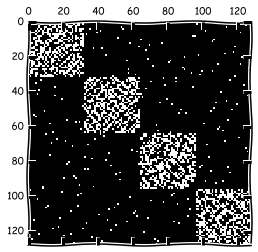

-----------
p =  1
alpha =  4
number of clusters:  128


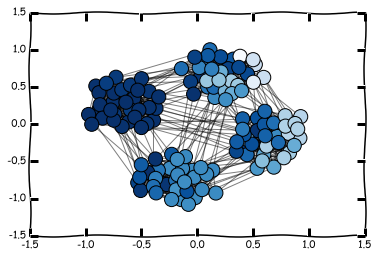

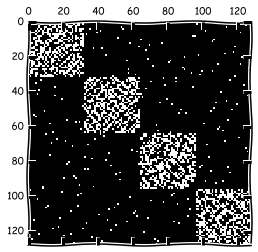

-----------
p =  2
alpha =  0
number of clusters:  128


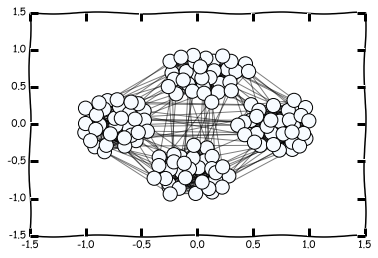

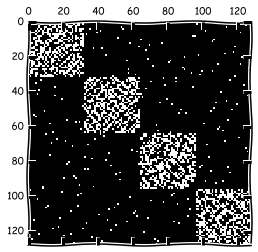

-----------
p =  2
alpha =  1
number of clusters:  128


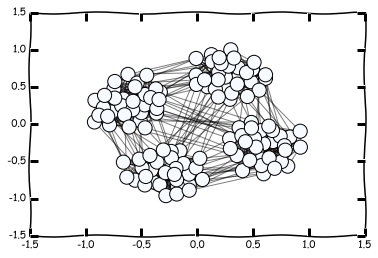

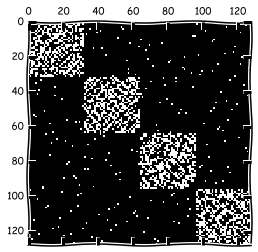

-----------
p =  2
alpha =  2
number of clusters:  4


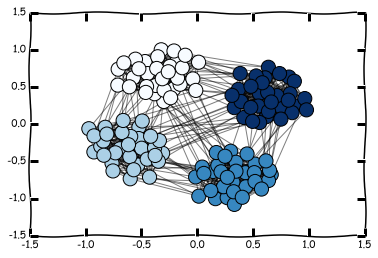

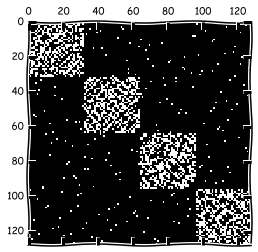

-----------
p =  2
alpha =  3
number of clusters:  127


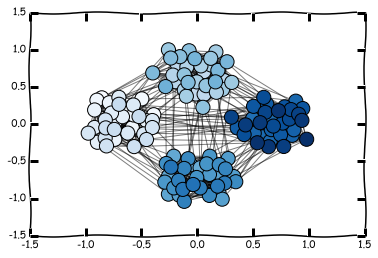

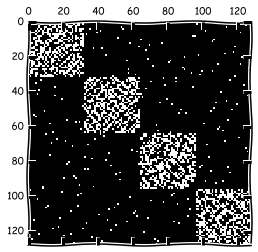

-----------
p =  2
alpha =  4
number of clusters:  128


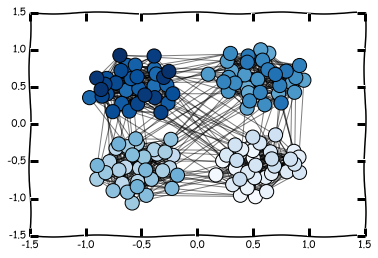

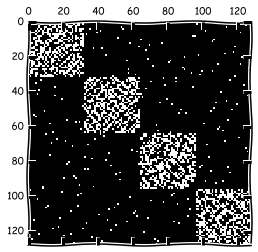

-----------
p =  3
alpha =  0
number of clusters:  128


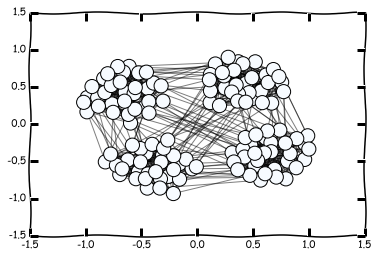

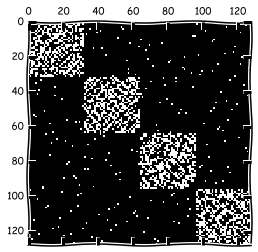

-----------
p =  3
alpha =  1
number of clusters:  128


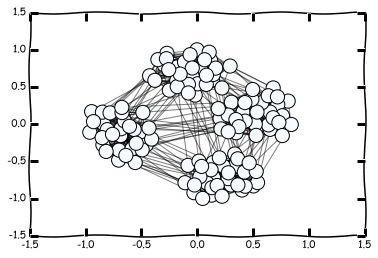

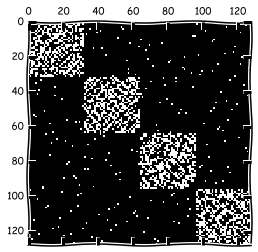

-----------
p =  3
alpha =  2
number of clusters:  4


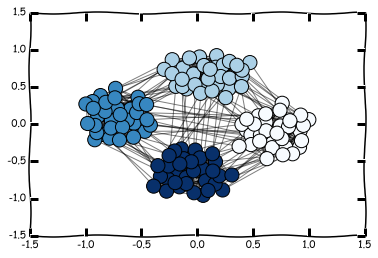

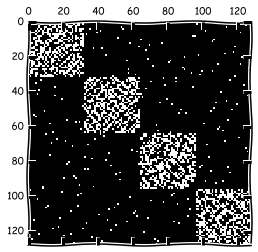

-----------
p =  3
alpha =  3
number of clusters:  4


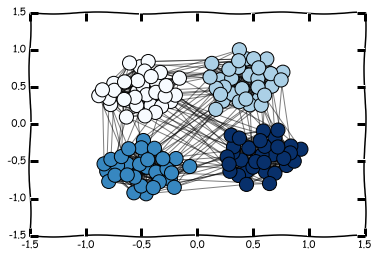

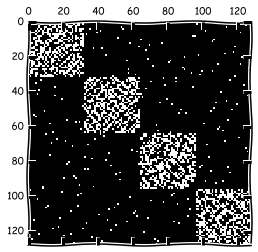

-----------
p =  3
alpha =  4
number of clusters:  4


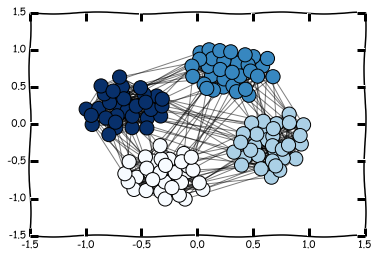

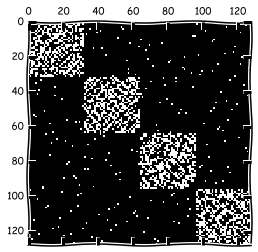

-----------
p =  4
alpha =  0
number of clusters:  128


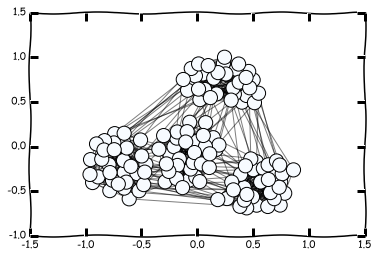

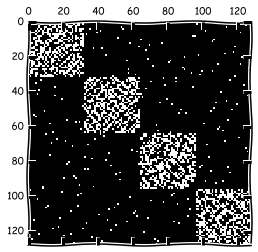

-----------
p =  4
alpha =  1
number of clusters:  128


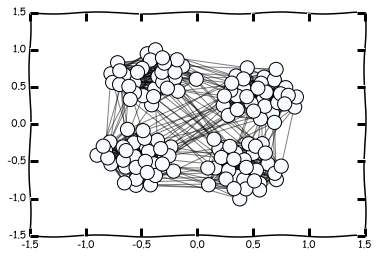

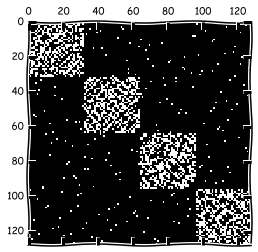

-----------
p =  4
alpha =  2
number of clusters:  4


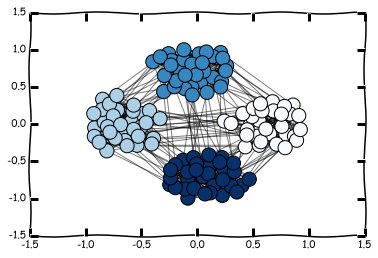

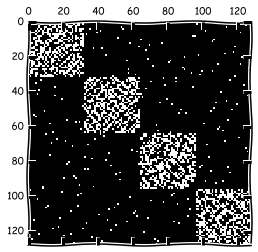

-----------
p =  4
alpha =  3
number of clusters:  4


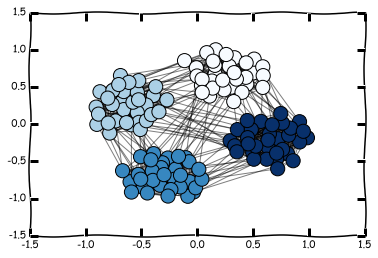

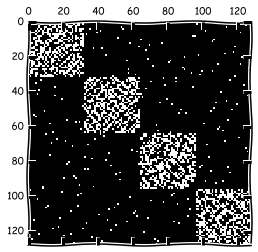

-----------
p =  4
alpha =  4
number of clusters:  4


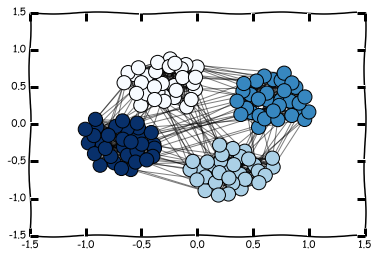

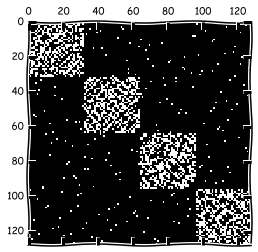

In [53]:
kk = 3
expands = (0, 1, 2, 3, 4)
inflates = (0, 1, 2, 3, 4)
nw = networks[0]
for exp in expands:
    for inf in inflates:
        kk += 1
        data = scipy.io.loadmat(nw)
        G = nx.Graph(data['A'])
        expand_factor = exp
        inflate_factor = inf
        print '-----------'
        print 'p = ', expand_factor
        print 'alpha = ', inflate_factor
        max_loop = 1000
        mult_factor = 1
        A = np.array(nx.adjacency_matrix(G).todense())
        M = add_diag(A, mult_factor)
        M = normalize(M)

        for i in range(max_loop):
            M = inflate(M, inflate_factor)
            M = expand(M, expand_factor)
            if stop(M, i): break

        clusters = get_clusters(M)
        print 'number of clusters: ', len(clusters)
        #print clusters


        clust_map = {}
        for k, vals in clusters.items():
            for v in vals:
                clust_map[v] = k

        colors = []
        for i in range(len(G.nodes())):
            colors.append(clust_map.get(i, 100))

        pos = nx.spring_layout(G)
        #print colors
        from matplotlib.pylab import matshow, show, cm
        plt.figure(kk)
        s1 = nx.draw_networkx_nodes(G, pos,node_size = 200, node_color = colors , cmap = plt.cm.Blues )
        s1 = nx.draw_networkx_edges(G,pos, alpha = 0.5)
        plt.show()
        kk += 1
        plt.figure(kk)
        matshow(A, cmap = cm.gray)
        plt.show()

As we can, we have a good result (4 correct clusters) only for (p = 2, alpha - 2); (p = 3, alpha = 2); (p = 3; alpha = 3); (p = 3, alpha = 4), (p = 4, alpha = 2), (p = 4, alpha = 3), (p = 4, alpha = 4). For other pairs we have 127 or 128 clusters.

-----------
p =  0
alpha =  0
number of clusters:  128


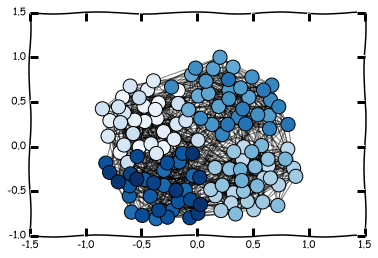

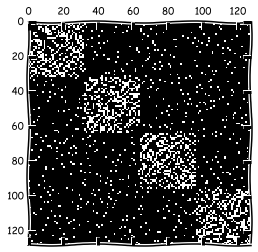

-----------
p =  0
alpha =  1
number of clusters:  128


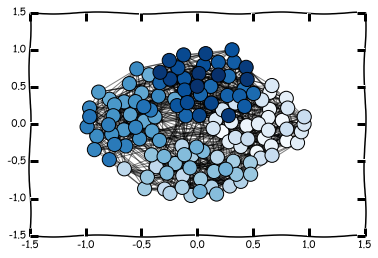

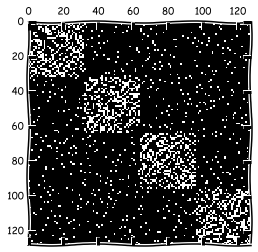

-----------
p =  0
alpha =  2
number of clusters:  128


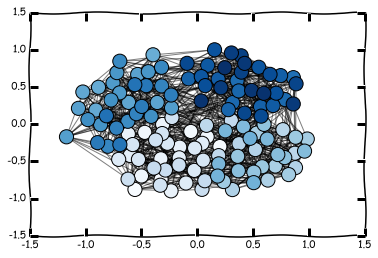

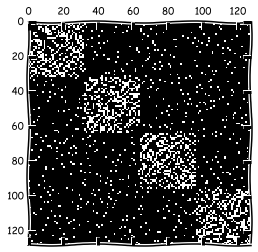

-----------
p =  0
alpha =  3
number of clusters:  128


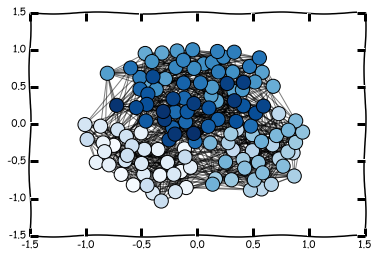

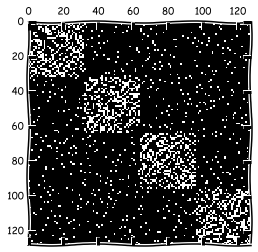

-----------
p =  0
alpha =  4
number of clusters:  128


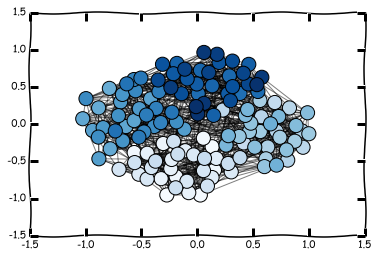

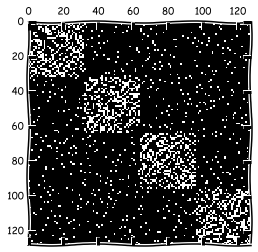

-----------
p =  1
alpha =  0
number of clusters:  128


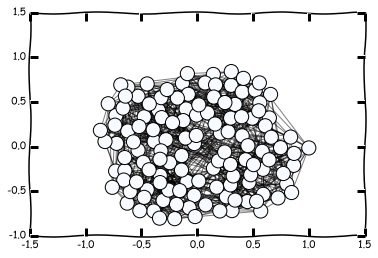

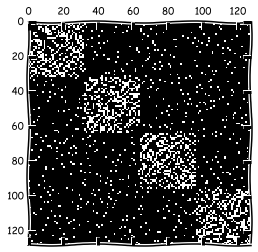

-----------
p =  1
alpha =  1
number of clusters:  128


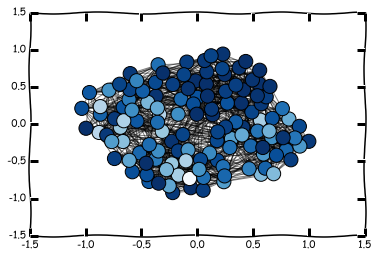

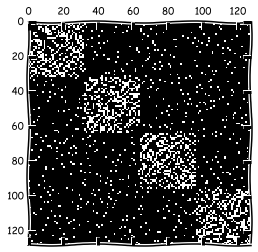

-----------
p =  1
alpha =  2
number of clusters:  128


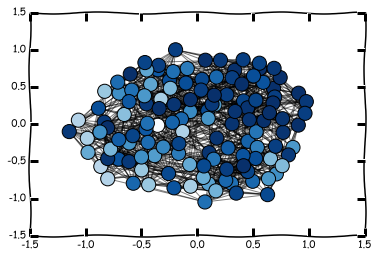

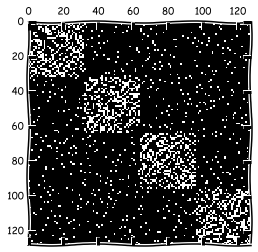

-----------
p =  1
alpha =  3
number of clusters:  128


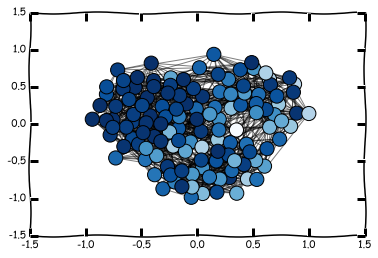

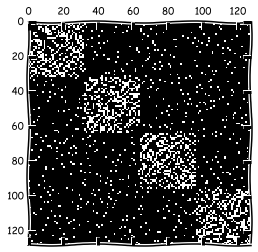

-----------
p =  1
alpha =  4
number of clusters:  128


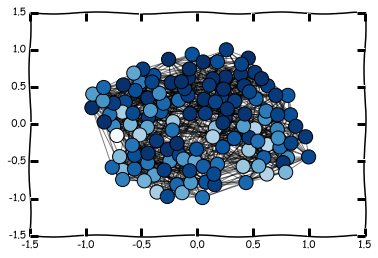

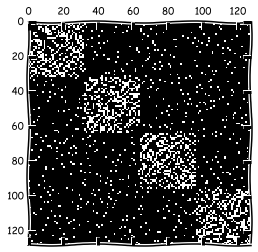

-----------
p =  2
alpha =  0
number of clusters:  128


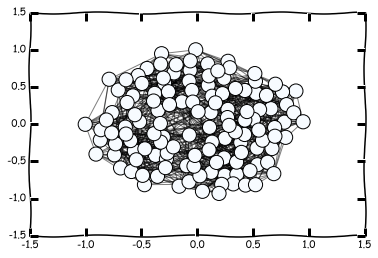

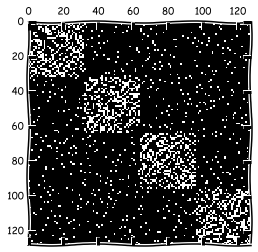

-----------
p =  2
alpha =  1
number of clusters:  128


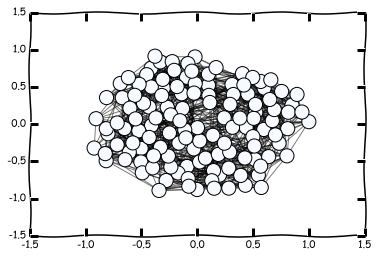

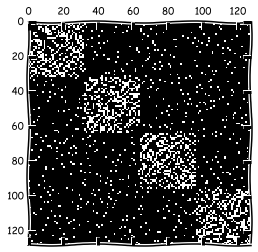

-----------
p =  2
alpha =  2
number of clusters:  6


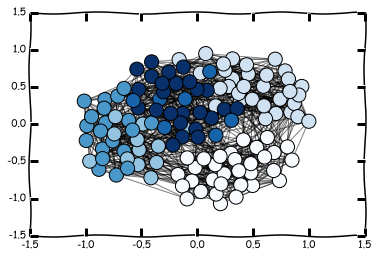

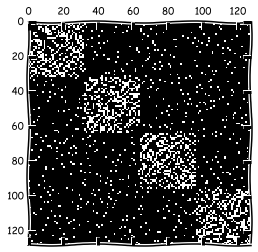

-----------
p =  2
alpha =  3
number of clusters:  128


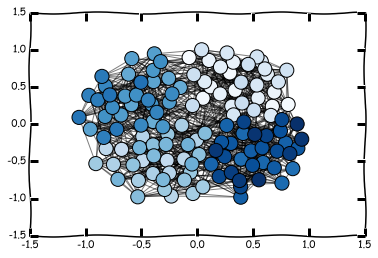

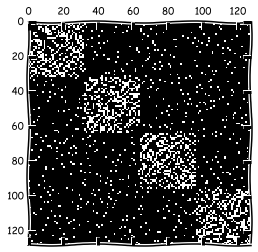

-----------
p =  2
alpha =  4
number of clusters:  128


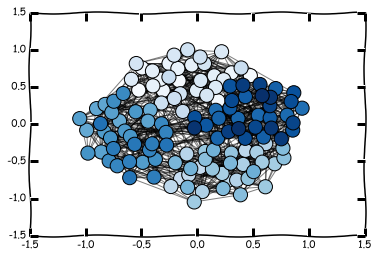

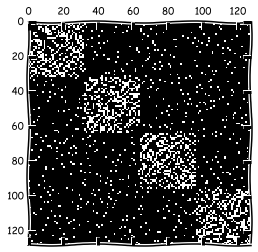

-----------
p =  3
alpha =  0
number of clusters:  128


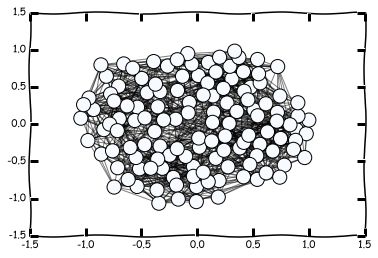

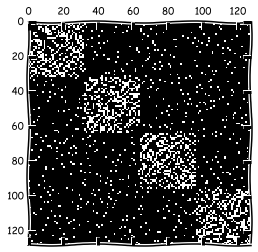

-----------
p =  3
alpha =  1
number of clusters:  128


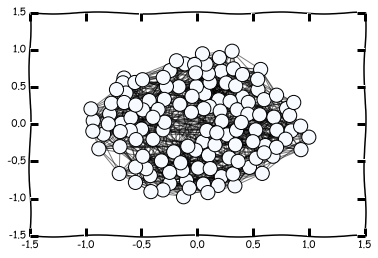

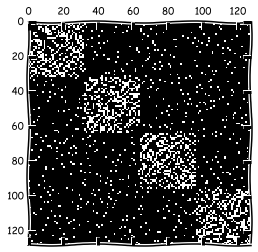

-----------
p =  3
alpha =  2
number of clusters:  1


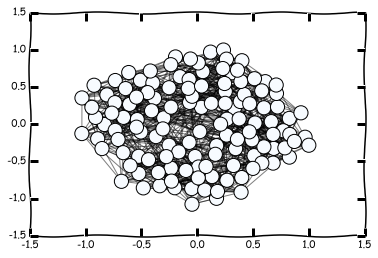

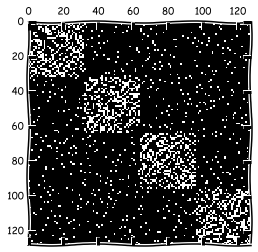

-----------
p =  3
alpha =  3
number of clusters:  4


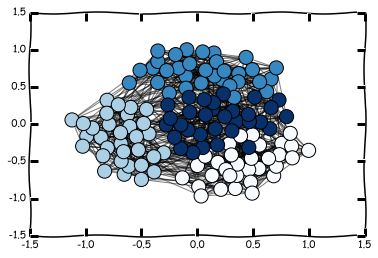

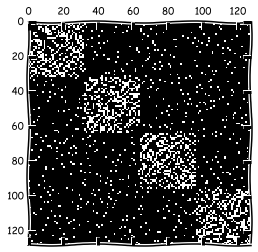

-----------
p =  3
alpha =  4
number of clusters:  4


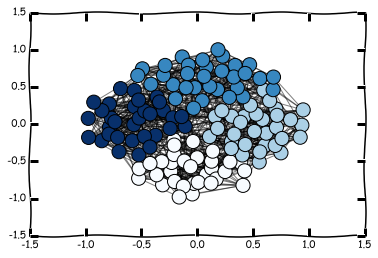

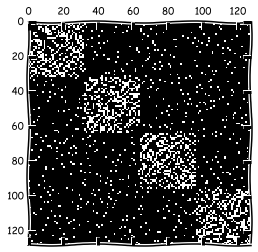

-----------
p =  4
alpha =  0
number of clusters:  128


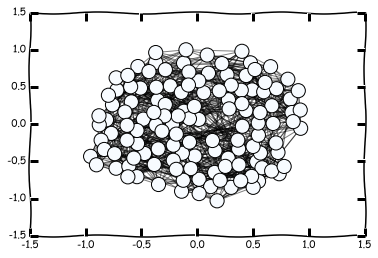

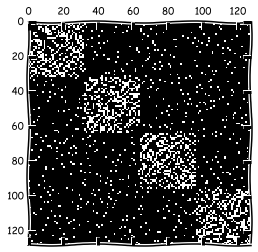

-----------
p =  4
alpha =  1
number of clusters:  128


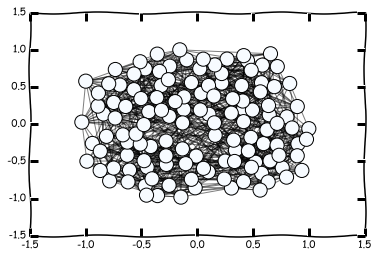

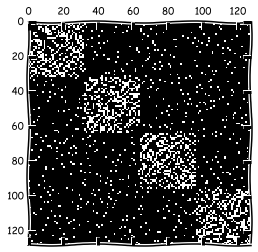

-----------
p =  4
alpha =  2
number of clusters:  1


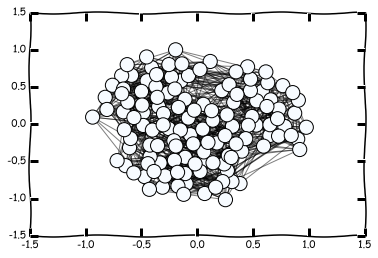

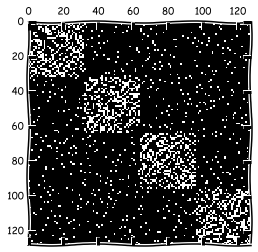

-----------
p =  4
alpha =  3
number of clusters:  1


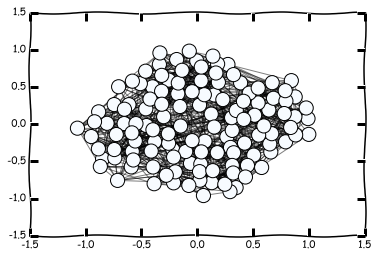

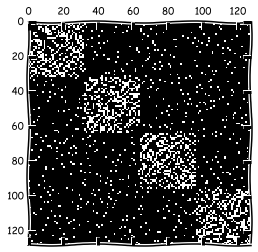

-----------
p =  4
alpha =  4
number of clusters:  4


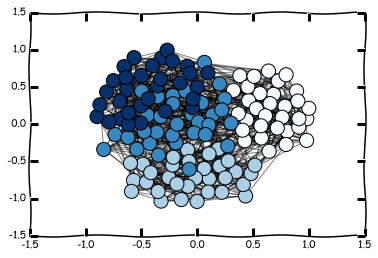

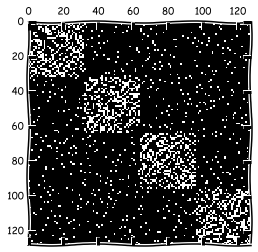

In [54]:
kk = 3
expands = (0, 1, 2, 3, 4)
inflates = (0, 1, 2, 3, 4)
nw = networks[1]
for exp in expands:
    for inf in inflates:
        kk += 1
        data = scipy.io.loadmat(nw)
        G = nx.Graph(data['A'])
        expand_factor = exp
        inflate_factor = inf
        print '-----------'
        print 'p = ', expand_factor
        print 'alpha = ', inflate_factor
        max_loop = 1000
        mult_factor = 1
        A = np.array(nx.adjacency_matrix(G).todense())
        M = add_diag(A, mult_factor)
        M = normalize(M)

        for i in range(max_loop):
            M = inflate(M, inflate_factor)
            M = expand(M, expand_factor)
            if stop(M, i): break

        clusters = get_clusters(M)
        print 'number of clusters: ', len(clusters)
        #print clusters


        clust_map = {}
        for k, vals in clusters.items():
            for v in vals:
                clust_map[v] = k

        colors = []
        for i in range(len(G.nodes())):
            colors.append(clust_map.get(i, 100))

        pos = nx.spring_layout(G)
        #print colors
        from matplotlib.pylab import matshow, show, cm
        plt.figure(kk)
        s1 = nx.draw_networkx_nodes(G, pos,node_size = 200, node_color = colors , cmap = plt.cm.Blues )
        s1 = nx.draw_networkx_edges(G,pos, alpha = 0.5)
        plt.show()
        kk += 1
        plt.figure(kk)
        matshow(A, cmap = cm.gray)
        plt.show()

As we can see, we have a good result (4 correct clusters) only for (p = 2, alpha - 2); (p = 3, alpha = 2) - 6 clusters; (p = 3; alpha = 3) - 4 clusters; (p = 3, alpha = 4) - 4 clusters; (p = 4, alpha = 2) - 1 cluster (not really a good result!), (p = 4, alpha = 3) - - 1 cluster (not really a good result!), (p = 4, alpha = 4) - 4 clusters. For other pairs we have 127 or 128 clusters. We have different partion of our graph for different parameters.

-----------
p =  0
alpha =  0
number of clusters:  128


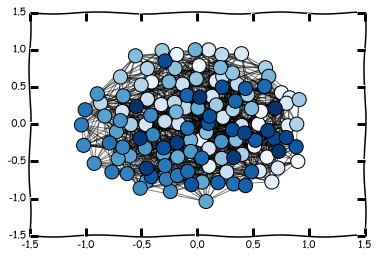

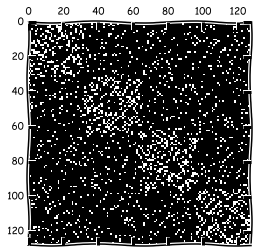

-----------
p =  0
alpha =  1
number of clusters:  128


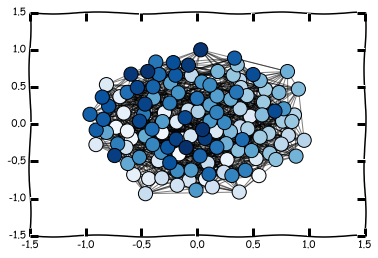

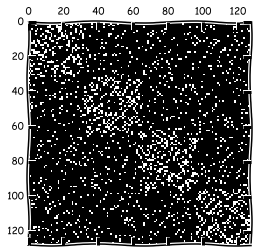

-----------
p =  0
alpha =  2
number of clusters:  128


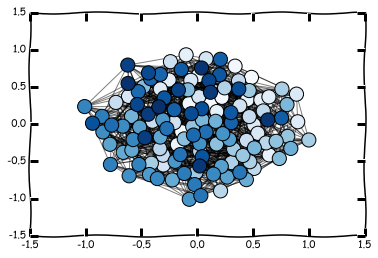

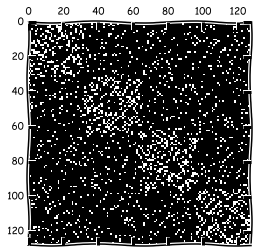

-----------
p =  0
alpha =  3
number of clusters:  128


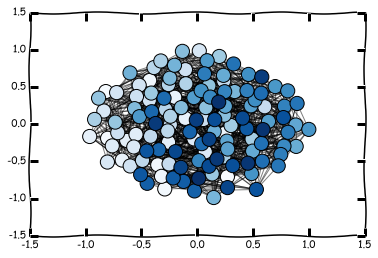

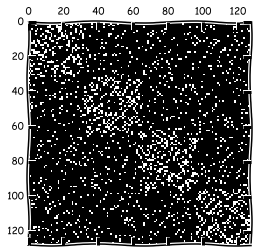

-----------
p =  0
alpha =  4
number of clusters:  128


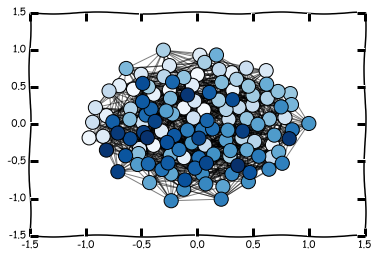

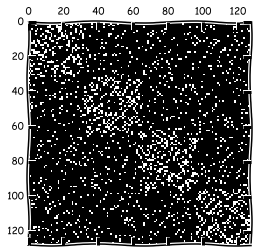

-----------
p =  1
alpha =  0
number of clusters:  128


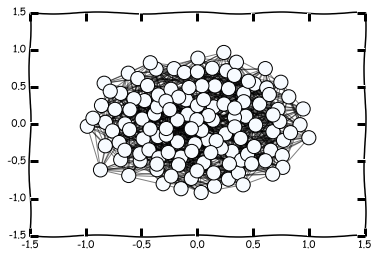

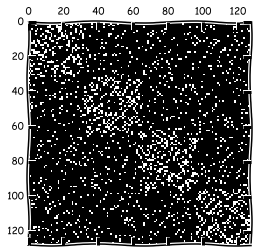

-----------
p =  1
alpha =  1
number of clusters:  128


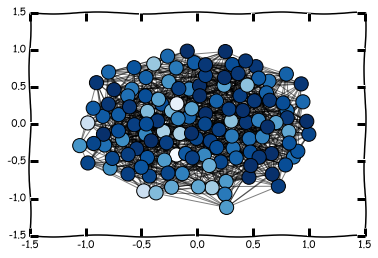

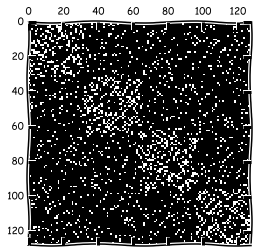

-----------
p =  1
alpha =  2
number of clusters:  128


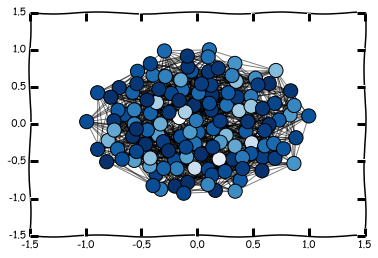

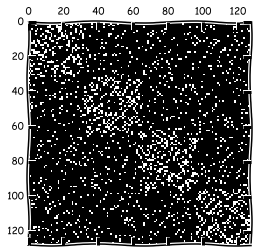

-----------
p =  1
alpha =  3
number of clusters:  128


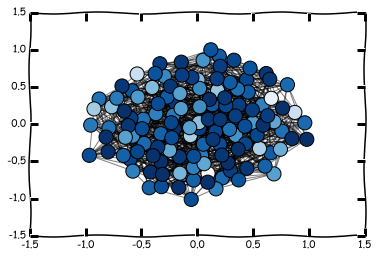

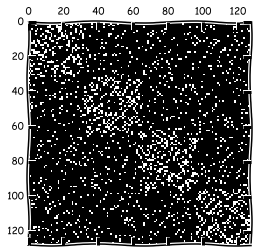

-----------
p =  1
alpha =  4
number of clusters:  128


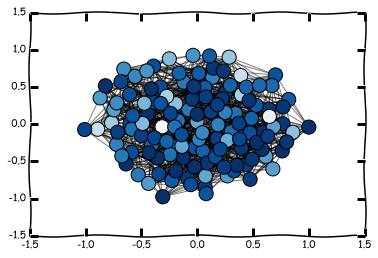

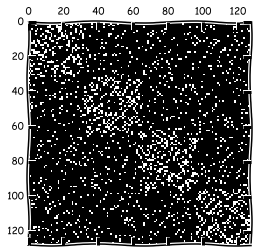

-----------
p =  2
alpha =  0
number of clusters:  128


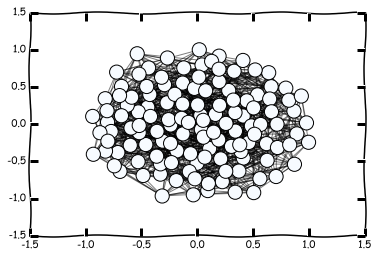

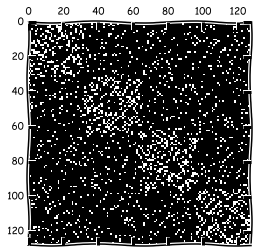

-----------
p =  2
alpha =  1
number of clusters:  128


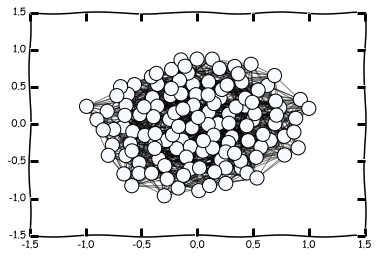

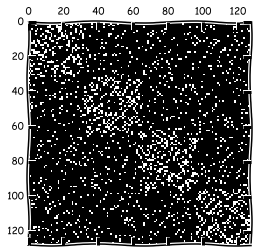

-----------
p =  2
alpha =  2
number of clusters:  128


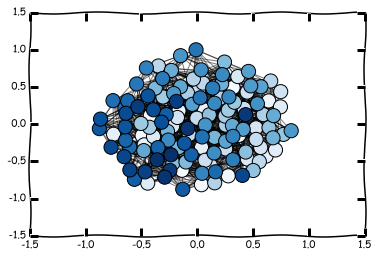

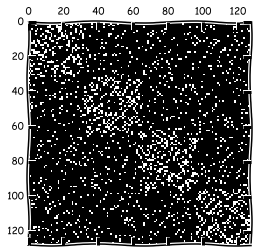

-----------
p =  2
alpha =  3
number of clusters:  128


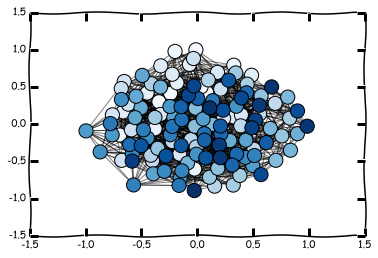

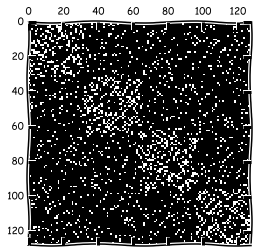

-----------
p =  2
alpha =  4
number of clusters:  128


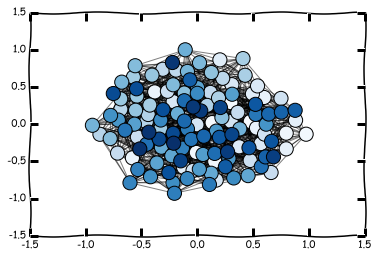

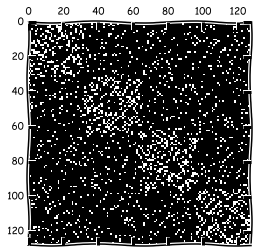

-----------
p =  3
alpha =  0
number of clusters:  128


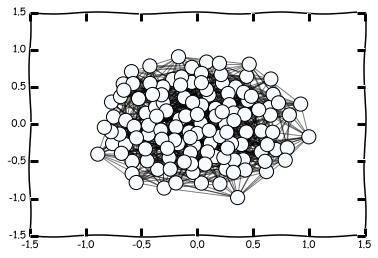

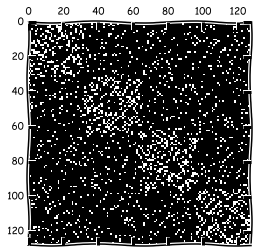

-----------
p =  3
alpha =  1
number of clusters:  128


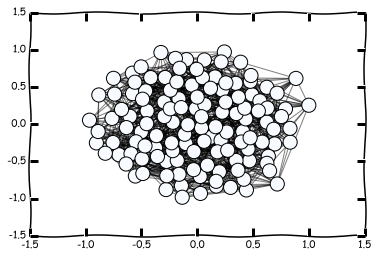

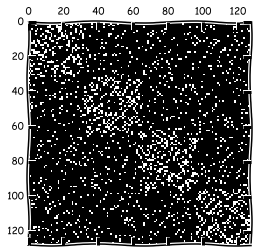

-----------
p =  3
alpha =  2
number of clusters:  1


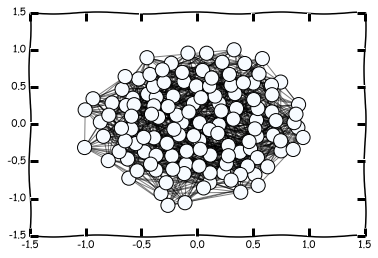

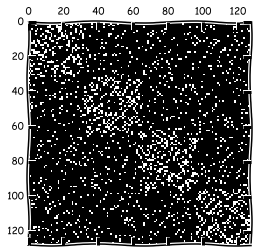

-----------
p =  3
alpha =  3
number of clusters:  1


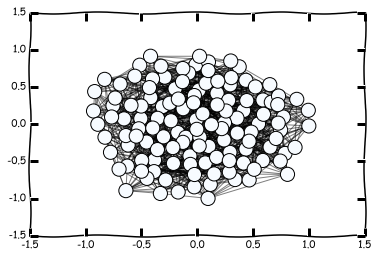

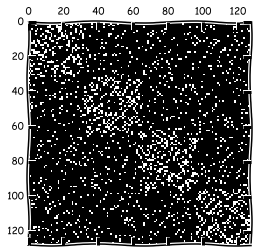

-----------
p =  3
alpha =  4
number of clusters:  2


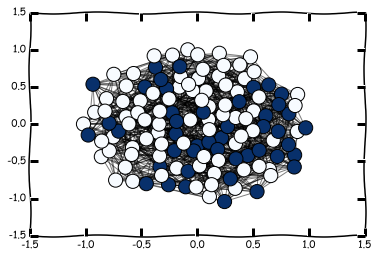

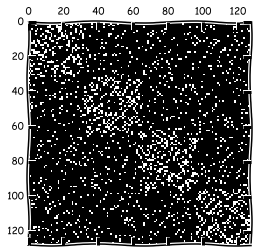

-----------
p =  4
alpha =  0
number of clusters:  128


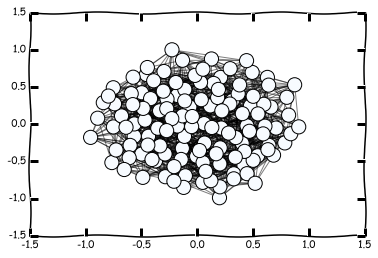

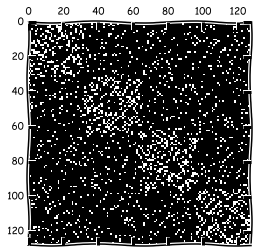

-----------
p =  4
alpha =  1
number of clusters:  128


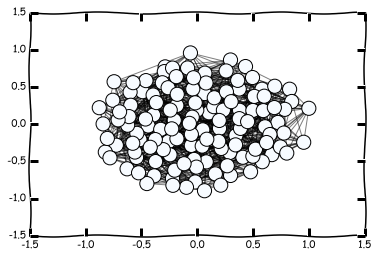

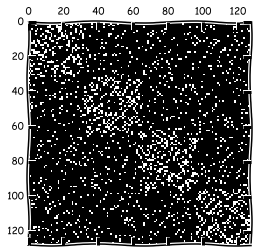

-----------
p =  4
alpha =  2
number of clusters:  1


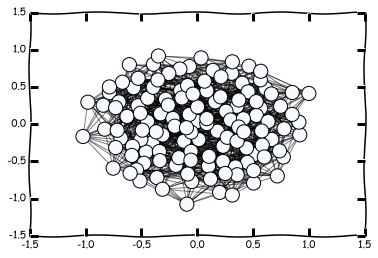

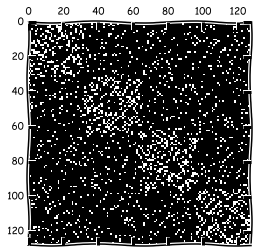

-----------
p =  4
alpha =  3
number of clusters:  1


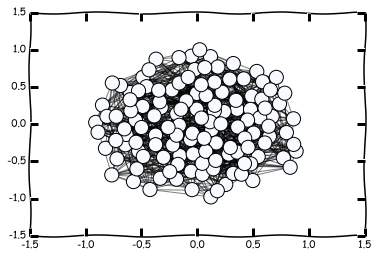

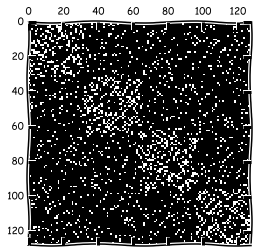

-----------
p =  4
alpha =  4
number of clusters:  1


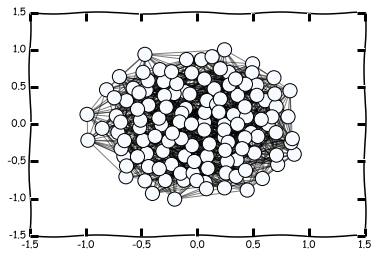

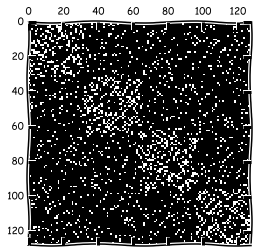

In [56]:
kk = 3
expands = (0, 1, 2, 3, 4)
inflates = (0, 1, 2, 3, 4)
nw = networks[2]
for exp in expands:
    for inf in inflates:
        kk += 1
        data = scipy.io.loadmat(nw)
        G = nx.Graph(data['A'])
        expand_factor = exp
        inflate_factor = inf
        print '-----------'
        print 'p = ', expand_factor
        print 'alpha = ', inflate_factor
        max_loop = 1000
        mult_factor = 1
        A = np.array(nx.adjacency_matrix(G).todense())
        M = add_diag(A, mult_factor)
        M = normalize(M)

        for i in range(max_loop):
            M = inflate(M, inflate_factor)
            M = expand(M, expand_factor)
            if stop(M, i): break

        clusters = get_clusters(M)
        print 'number of clusters: ', len(clusters)
        #print clusters


        clust_map = {}
        for k, vals in clusters.items():
            for v in vals:
                clust_map[v] = k

        colors = []
        for i in range(len(G.nodes())):
            colors.append(clust_map.get(i, 100))

        pos = nx.spring_layout(G)
        #print colors
        from matplotlib.pylab import matshow, show, cm
        plt.figure(kk)
        s1 = nx.draw_networkx_nodes(G, pos,node_size = 200, node_color = colors , cmap = plt.cm.Blues )
        s1 = nx.draw_networkx_edges(G,pos, alpha = 0.5)
        plt.show()
        kk += 1
        plt.figure(kk)
        matshow(A, cmap = cm.gray)
        plt.show()

As we can see, the algorithm works really bad for all parametrs and can find only 128 clusters or 1, except of (p = 3, alpha = 4), but it doesn't look 100% true. Well, maybe this notework is really hard to partition.

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [ ]:
import scipy.io

data = scipy.io.loadmat('music_data.mat')